Mean Squared Error (MSE): 4.2584299148757594e-09
R-squared: -0.004272621093971196


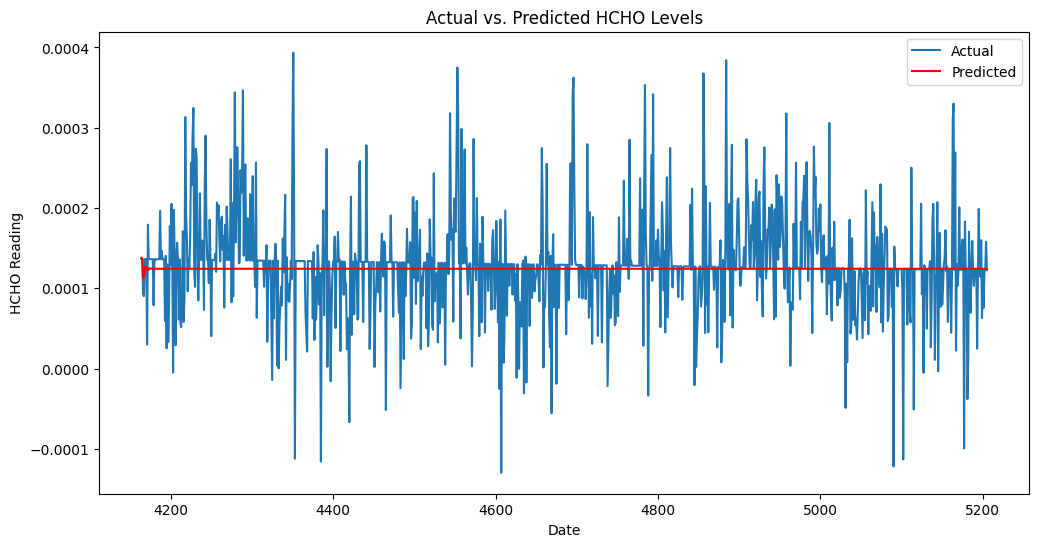

In [1]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("D:\DESKTOP\DE CW\____Filtered_Data.csv")

# Preprocess the data if needed (handle missing values, encode categorical variables, etc.)
# For time series data, ensure that the 'Date' column is in datetime format and set it as index

# Split the data into training and testing sets
train_size = int(len(data) * 0.8)  # 80% train, 20% test
train_data, test_data = data[:train_size], data[train_size:]

# Define the ARIMA model
model = ARIMA(train_data['HCHO Reading'], order=(5,1,0))  # Example ARIMA parameters, adjust as needed

# Fit the model to the training data
model_fit = model.fit()

# Make predictions on the test data
predictions = model_fit.forecast(steps=len(test_data))

# Evaluate the model's performance
mse = mean_squared_error(test_data['HCHO Reading'], predictions)
r_squared = r2_score(test_data['HCHO Reading'], predictions)

print("Mean Squared Error (MSE):", mse)
print("R-squared:", r_squared)

# Plot actual vs. predicted values
plt.figure(figsize=(12, 6))
plt.plot(test_data.index, test_data['HCHO Reading'], label='Actual')
plt.plot(test_data.index, predictions, color='red', label='Predicted')
plt.title('Actual vs. Predicted HCHO Levels')
plt.xlabel('Date')
plt.ylabel('HCHO Reading')
plt.legend()
plt.show()
